# 02: Likelihood fits

In [1]:
import SMEFT19
from parscanning import GridScan
from SMEFT19.scenarios import rotBII
from SMEFT19 import likelihood_fits
import warnings

/opt/conda/envs/smeft19/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
beta_obs = ['Ft(10C)', 'Ft(14O)', 'Ft(22Mg)', 'Ft(26mAl)', 'Ft(34Cl)', 'Ft(34Ar)', 'Ft(38mK)', 'Ft(38Ca)',
            'Ft(42Sc)', 'Ft(46V)', 'Ft(50Mn)', 'Ft(54Co)', 'Ft(62Ga)', 'Ft(74Rb)']
SMEFT19.SMEFTglob.restart_smelli(custom_likelihoods={'beta':beta_obs})

In [5]:
d_ell = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')
bf1 = d_ell['bf']

def fit_l(x):
    return rotBII([bf1[0], x[0], x[1], bf1[3], bf1[4]])

In [6]:
xmin = -0.15
xmax = 0.15
ymin = -0.02
ymax = 0.02
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, fit_l)
GS.save_csv('../data/likelihood/likelihood_rotBII_l.dat')

In [8]:
def fit_q(x):
    return rotBII([bf1[0], bf1[1], bf1[2], x[0], x[1]])

In [9]:
xmin = -0.15
xmax = 0.15
ymin = -0.5
ymax = 2.5
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(likelihood_fits, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4, fit_q)
GS.save_csv('../data/likelihood/likelihood_rotBII_q.dat')

## Plotting

In [2]:
import numpy as np
import pandas as pd
from SMEFT19.plots import likelihood_plot

In [3]:
def read_meshgrid(fname, stepx=50, stepy=50):
    zdata = pd.read_csv(fname, sep='\t')
    xcoords = np.linspace(zdata['x'].min(), zdata['x'].max(), stepx)
    ycoords = np.linspace(zdata['y'].min(), zdata['y'].max(), stepy)
    fitcodes = {r'$R_{K^{(*)}}$':'likelihood_lfu_fcnc.yaml', r'$R_{D^{(*)}}$':'likelihood_rd_rds.yaml',
                'LFV':'likelihood_lfv.yaml', 'Global':'global'}
    d = {}
    for k, v in zip(fitcodes.keys(), fitcodes.values()):
        z = np.array(zdata[v]).reshape(stepx, stepy)
        d.update({k:z})
    return (xcoords, ycoords, d)

linewidths is ignored by contourf
No contour levels were found within the data range.


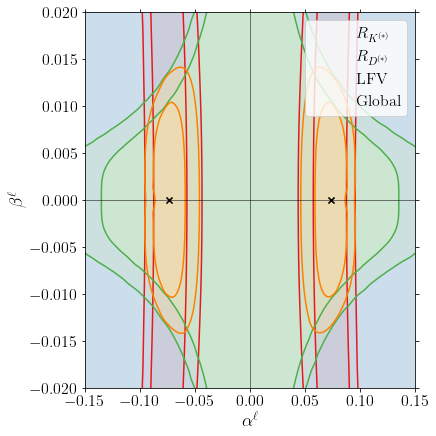

In [7]:
likelihood_plot(read_meshgrid('../data/likelihood/likelihood_rotBII_l.dat'),
                -0.15, 0.15, -0.02, 0.02, [r'$\alpha^\ell$', r'$\beta^\ell$'], locleg='upper right',
                colors=[0,1,2,4], bf=([bf1[1], bf1[2]], [-bf1[1], bf1[2]]),
                widths=[1.5,]*5, ticks=(0.05, 0.005),  fout='../data/plots/alphabeta_l')

linewidths is ignored by contourf


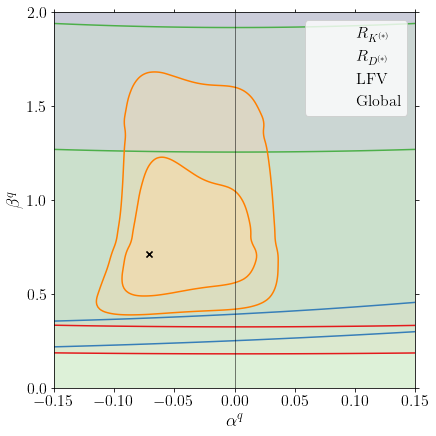

In [10]:
likelihood_plot(read_meshgrid('../data/likelihood/likelihood_rotBII_q.dat'),
                -0.15, 0.15, 0, 2., [r'$\alpha^q$', r'$\beta^q$'], locleg='upper right', ticks=(0.05, 0.5),
                colors=[0,1,2,4], bf=[bf1[3], bf1[4]], widths=[1.5,]*5, fout='../data/plots/alphabeta_q')